In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import re
import json

#ML
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

## EDA

In [2]:
with open('ruta_titanic.json') as config_file:
    file_paths = json.load(config_file)

train = pd.read_csv(file_paths["train_csv_path"])
test = pd.read_csv(file_paths["test_csv_path"])
test_ids= test['PassengerId']

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

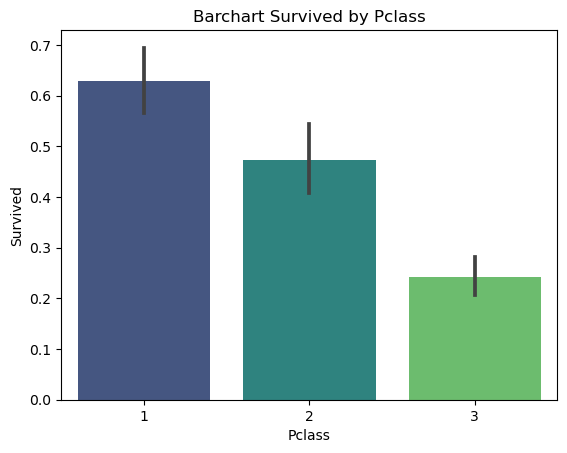

In [7]:
def barchart(col):
    sns.barplot(data=train, x=col, y='Survived',palette='viridis')
    plt.title('Barchart Survived by Pclass')
    plt.show
barchart('Pclass')

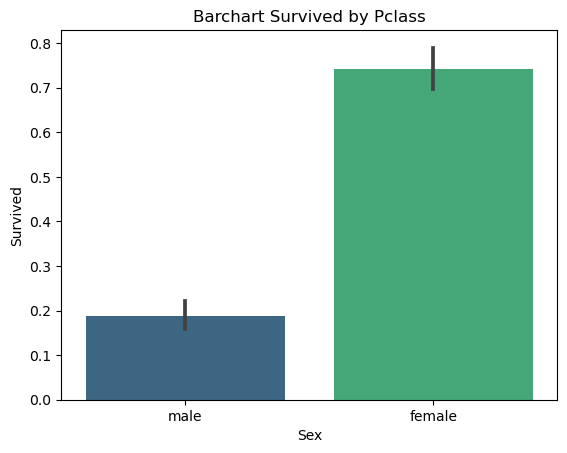

In [8]:
barchart('Sex')

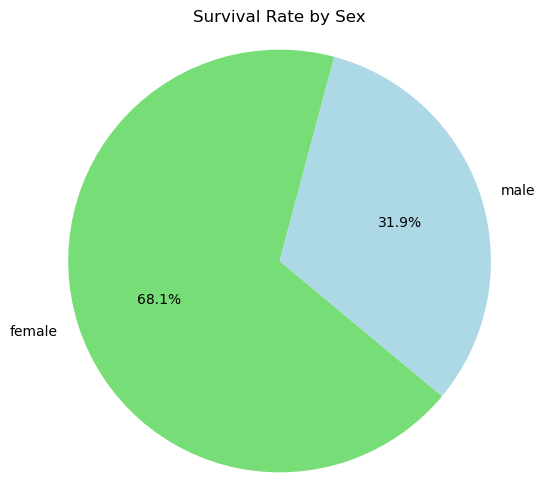

In [9]:
survived_count = train.groupby(['Sex', 'Survived']).size().unstack()

plt.figure(figsize=(6, 6))
colors = ['#77DD77', '#ADD8E6'] 
plt.pie(survived_count[1], labels=survived_count.index, autopct='%1.1f%%', startangle=75, colors=colors)

plt.title('Survival Rate by Sex')

plt.axis('equal') 
plt.show()

C:\Users\Alejandro López\AppData\Local\Temp\ipykernel_7824\3745357607.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=train, x=col, palette='viridis')
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


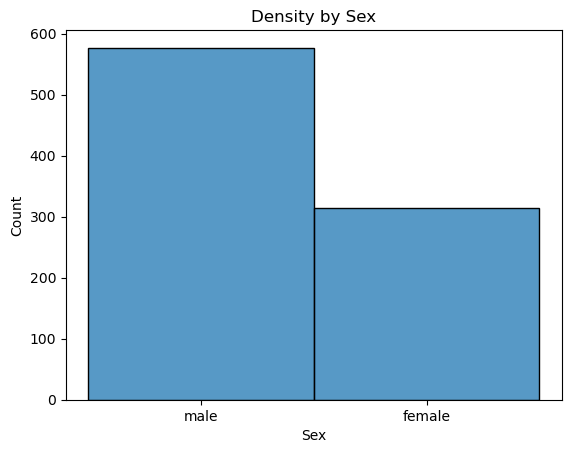

C:\Users\Alejandro López\AppData\Local\Temp\ipykernel_7824\3745357607.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=train, x=col, palette='viridis')
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


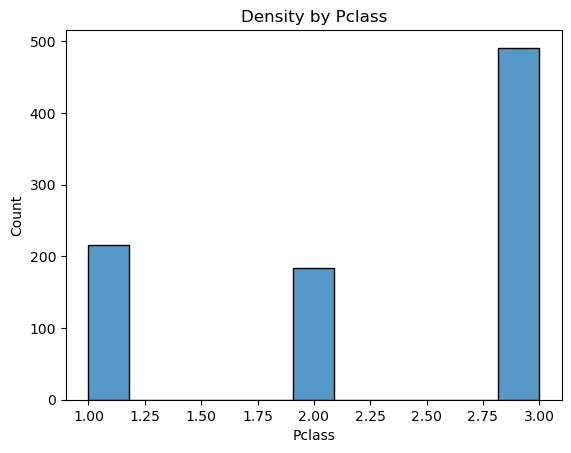

C:\Users\Alejandro López\AppData\Local\Temp\ipykernel_7824\3745357607.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=train, x=col, palette='viridis')
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


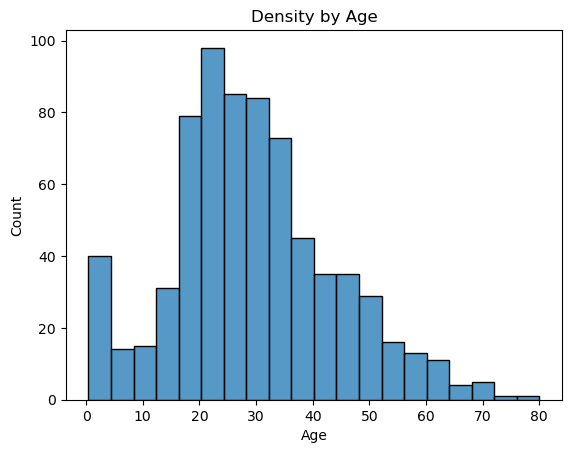

C:\Users\Alejandro López\AppData\Local\Temp\ipykernel_7824\3745357607.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=train, x=col, palette='viridis')
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


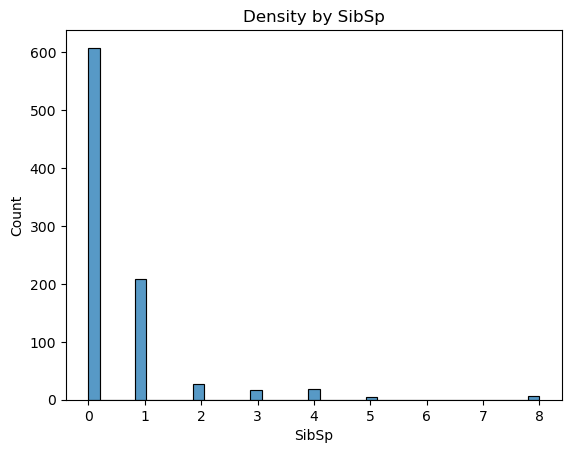

C:\Users\Alejandro López\AppData\Local\Temp\ipykernel_7824\3745357607.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=train, x=col, palette='viridis')
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


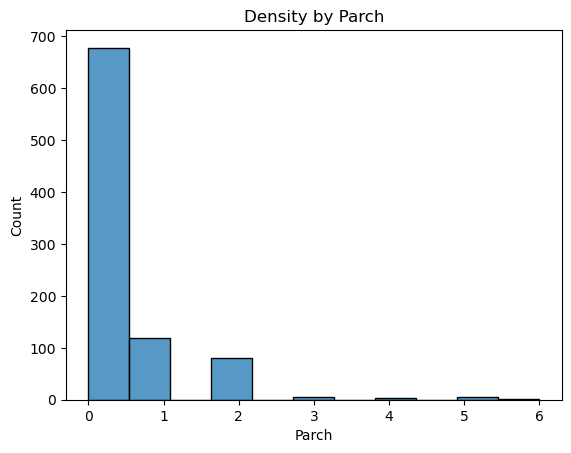

C:\Users\Alejandro López\AppData\Local\Temp\ipykernel_7824\3745357607.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=train, x=col, palette='viridis')
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


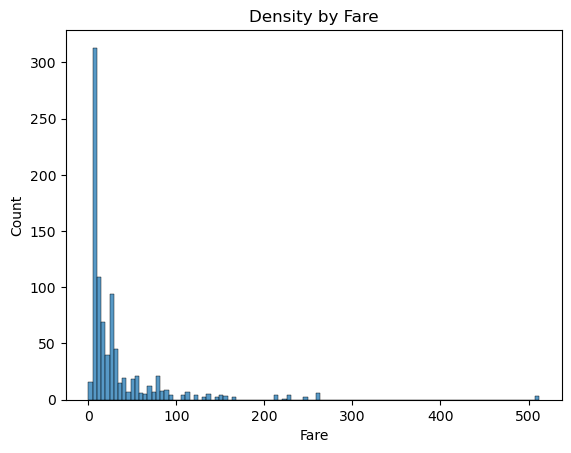

C:\Users\Alejandro López\AppData\Local\Temp\ipykernel_7824\3745357607.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=train, x=col, palette='viridis')
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


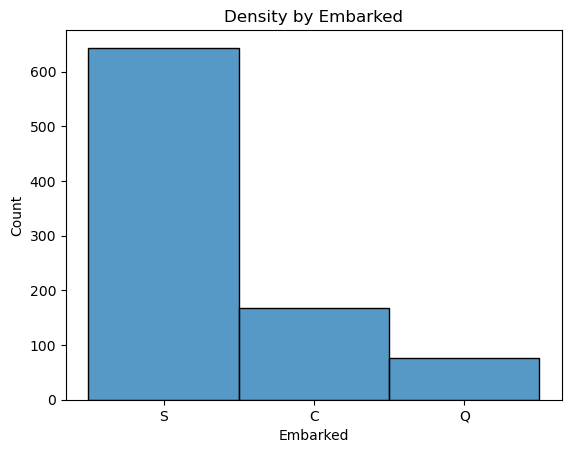

In [10]:
def histplot(col):
    sns.histplot(data=train, x=col, palette='viridis')
    plt.title(f'Density by {col}')
    plt.show()

hist_cols= ['Sex','Pclass','Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
for col in hist_cols:
    histplot(col)

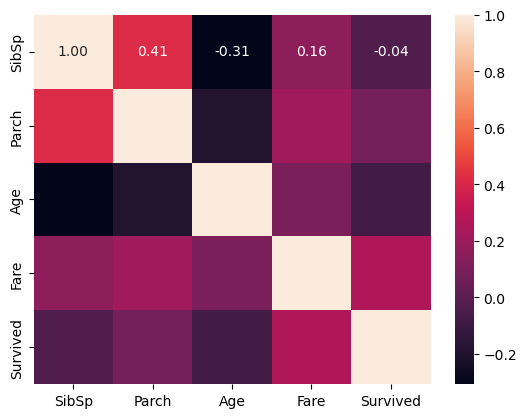

In [11]:
#heatmap
list_cols= ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(data=train[list_cols].corr(),annot = True, fmt = ".2f")
plt.show()

In [12]:
# Age

age_mean=train['Age'].mean()
age_median=train['Age'].median()
age_mean_survived=train.loc[train.Survived == 1]['Age'].mean()
age_mean_not_surv=train.loc[train.Survived == 0]['Age'].mean()

print('Age mean', age_mean)
print('Age median',age_median)
print('Age mean survived',age_mean_survived)
print('Age mean not survived',age_mean_not_surv)

Age mean 29.69911764705882
Age median 28.0
Age mean survived 28.343689655172415
Age mean not survived 30.62617924528302


In [13]:
# Fare

fare_mean=train['Fare'].mean()
fare_median= train['Fare'].median()
fare_mean_survived=train.loc[train.Survived == 1]['Fare'].median()
fare_mean_NotSurvived=train.loc[train.Survived == 0]['Fare'].median()

print('Fare mean',fare_mean)
print('Fare median', fare_median)
print('Fare median survived',fare_mean_survived)
print('Fare median Not Survived',fare_mean_NotSurvived)

Fare mean 32.204207968574636
Fare median 14.4542
Fare median survived 26.0
Fare median Not Survived 10.5


In [14]:
# Embarked
Embarked = train.value_counts('Embarked')
Embarked_survived=train.loc[train.Survived == 1].value_counts('Embarked')
Embarked_NotSurvived=train.loc[train.Survived == 0].value_counts('Embarked')
Embarked_percent_survived=train.loc[train.Survived == 1].value_counts('Embarked')/train.value_counts('Embarked')
Embarked_percent_NotSurvived=train.loc[train.Survived == 0].value_counts('Embarked')/train.value_counts('Embarked')

print('Embarked',Embarked)
print('Embarked Survived', Embarked_survived)
print('Embarked_NotSurvived',Embarked_NotSurvived)
print('Embarked_percent_survived', Embarked_percent_survived)
print('Embarked_percent_NotSurvived',Embarked_percent_NotSurvived)

Embarked Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Embarked Survived Embarked
S    217
C     93
Q     30
Name: count, dtype: int64
Embarked_NotSurvived Embarked
S    427
C     75
Q     47
Name: count, dtype: int64
Embarked_percent_survived Embarked
S    0.336957
C    0.553571
Q    0.389610
Name: count, dtype: float64
Embarked_percent_NotSurvived Embarked
S    0.663043
C    0.446429
Q    0.610390
Name: count, dtype: float64


## Outliers dropping

In [16]:
def outliers(data, variables):
    outlier_indices = [] 
    
    for variable in variables:
        IQ1 = np.percentile(data[variable], 25)
        IQ3 = np.percentile(data[variable], 75)

        IQR = IQ3 - IQ1

        outliers_thrsh = IQR * 1.5
        outlier_list_col = data[(data[variable] < IQ1 - outliers_thrsh) | (data[variable] > IQ3 + outliers_thrsh)].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [17]:
train.loc[outliers(train,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [18]:
train = train.drop(outliers(train,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)